<a href="https://colab.research.google.com/github/johanjan/MOOC-HPFEM-source/blob/master/ModernScientificPaper_kthWorkshop_anim_2D_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Modern Scientific Paper: addressing reproducibility in simulated data through interactive computing**
---


#### Johan Jansson (jjan@kth.se)$^{a,*}$, L. Ridgway Scott$^b$, Rebecca Durst$^c$
$^a$ *KTH*, $\hspace{0.25cm} ^b$ *University of Chicago*,  $\hspace{0.25cm} ^c$ *University of Pittsburgh*

---
**Abstract** *We present an example of the use of* Google Colaboratory (Colab) *as a means for sharing data produced by simulations in scientific research. As a Jupyter notebook environment,* Colab *may be used in conjunction with* Invenio *to directly share the codes and coding environment required to run a simulation. We format this example as an* ***interactive scientific paper*** *to demonstrate how the* Colab *environment allows us to change how we simulate and share data.*


---





---


## **Introduction**

 [*Google Colaboratory*](https://research.google.com/colaboratory/faq.html), or *Colab*, is a Jupyter notebook environment for writing and executing Python code. The primary selling point of this environment is that *Colab* runs in the cloud, and the notebooks are stored and shared on Google Drive. **Thus a simulation written and shared with *Colab* may be executed on any computer at any time.** 

Furthermore, **no downloads or installations are required to run a simmulation in *Colab*,** as the files, libraries, and packages needed for a simulation can be imported directly into the notebook. Thus, *Colab* allows researchers to share code in a "ready-to-use" format, and numerical simulations used in research may be shared in such a way that anyone can interact with the code exactly as it was used to produce the published results. For scientific computation, this is the equivalent of a chemist replicating their entire laboratory set up and conditions for an experiment in any laboratory in the world.

We have formatted this notebook as an ***interactive*** scientific paper to demonstrate how environments such as *Colab* can change the way in which data from scientific simulations is published to ensure reproducibility and encourage transparency in science.

## **An example simulation**

To demonstrate the advantages of the *Colab* environment, we will walk through an example simulation of two-dimensional fluid flow around a solid object. ***No knowledge of the mathematical model or the software is needed to follow this example.***$^{++}$

For this example, we require FEniCS, a scientific simulation software, Paraview, a scientific visualization application, and a handful of user-defined functions and scripts downloaded from an online repository. We may then import the necessary libraries.

 **To set this all up, we only need to run the following two cells:**

In [ ]:
#@title
#*Note: this cell may take a minute or two to run.*

# Setup system environment and define utility functions and variables


from google.colab import files

print("Installing Digital Math/FEniCS environment.")

try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" 1>ilog1 2>ilog2 && bash "/tmp/fenics-install.sh" 1>ilog1 2>ilog2
    import dolfin


!apt-get install ffmpeg 1>ilog1 2>ilog2

!wget -c http://www.csc.kth.se/~jjan/digitalmath/plot_u.py 1>ilog1 2>ilog2
!wget -c http://www.csc.kth.se/~jjan/digitalmath/plot_u_anim.py 1>ilog1 2>ilog2
!wget -c http://www.csc.kth.se/~jjan/digitalmath/viz.sh 1>1log1 2>ilog2
!wget -c -O ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit.tar.gz 'https://www.paraview.org/paraview-downloads/download.php?submit=Download&version=v5.9&type=binary&os=Linux&downloadFile=ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit.tar.gz' 1>ilog1 2>ilog2
!tar xzvf ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit.tar.gz --skip-old-files 1>ilog1 2>ilog2


Installing Digital Math/FEniCS environment.


In [ ]:
%%writefile file01.py

# Copyright (c) 2017-2018 Johan Jansson, Måns Andersson, Cem Degirmenci, David Kamensky, FEniCS community contributions 

#Importing the necessary libraries

import time

from dolfin import *
from mshr import *

from fenics import *


Writing file01.py


$++$ ***For the sake of transparancy, we note that we use a method known as direct finite element simulation (DFS) developed by Johan Jansson and colleagues.***

## **Interactive Component: Define the Domain**

We will consider 2D fluid flow around a circle. You may consider this a birds-eye view of airflow around a cylindrical building, for example. **For this example, we want to explore how the flow behavior changes depending on the radius of the circle.** Thus, we begin by defining the domain on which our system is solved, which will be a rectangle containing a circle of radius *R*.

*Colab* is well set up for interactivity and sharing. Here we will use Forms to make it easy for any one to test different values of the radius *R* without knowing where to change the value in the code cell. 

**Move the slider to a desired value of *R*.** Once the value of *R* is chosen, click the arrow or play-button on the left to execute the cell. 

 *Hint: Start with a small value for R--maybe the lowest possible. Once we run the simulation, we will return to this section to test other radii.*

In [ ]:
R = 0.06 #@param {type:"slider", min:0.01, max:0.15, step:0.01}
fR = open("R.txt", "w")
fR.write(str(R))
fR.close()

In [ ]:
%%writefile file02.py

fR = open("R.txt", "r")
R = float(fR.read())

XMIN = 0.; XMAX = 4; YMIN = 0; YMAX = 1; G = [XMIN, XMAX, YMIN, YMAX]; eps = 1e-5; mresolution=75 # Geometry and mesh
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])) - Circle(Point(.5, .5), R), mresolution)
#plot(mesh)
print('The domain in which a fluid is flowing around a circle of radius R =', R)

Writing file02.py


## **The Code**

This section of the code sets up the system of equations we will solve and carries out the computations, so it is safe to skip it if you are not particularly interested in FEniCS or computational fluid dynamics.

However, we also use this section as an opportunity to demonstrate how the formatting options in *Colab* may be used in place of traditional commenting to make a code readable and accessible. As we can see if we expand this section, the code is broken up into several cells, depending on the processes carried out in each segment. Each section is then headed by a text cell explaining what the code in each segment is accomplishing. 

We have only added brief descriptions for the code cells here, however more information could easily be added. Consequently, these formatting options combined with the sharability of *Colab* allow us to make a code reasonably comprehensible even to those without much familiarity with the methods used. It could also be a useful tool in education.

### Setting up the problem

#### Define the finite element spaces and functions

*   u is the velocity
*   p is the pressure


In [ ]:
%%writefile file03.py

VE = VectorElement("CG", mesh.ufl_cell(), 1); QE = FiniteElement("CG", mesh.ufl_cell(), 1); h = CellDiameter(mesh); # FEM functions
WE = VE * QE; W = FunctionSpace(mesh, WE); V = FunctionSpace(mesh, VE); Q = FunctionSpace(mesh, QE) # Make a mixed space
(v, q) = TestFunctions(W); w = Function(W); (u, p) = (as_vector((w[0], w[1])), w[2]); u0 = Function(V)

Writing file03.py


#### Set up Boundaries


* Define the inflow velocity, $u_{in}$ 
* Mark boundary and interior regions



In [ ]:
%%writefile file04.py

uin = Expression(("4*(x[1]*(YMAX-x[1]))/(YMAX*YMAX)", "0."), YMAX=YMAX, element = V.ufl_element()) # Inflow velocity
om = Expression("x[0] > XMAX - eps ? 1. : 0.", XMAX=XMAX, eps=eps, element = Q.ufl_element()) # Marks region to the right (outside) of outflow boundary
im = Expression("x[0] < XMIN + eps ? 1. : 0.", XMIN=XMIN, eps=eps, element = Q.ufl_element()) #Marks region to the left of inflow boundary
nm = Expression("x[0] > XMIN + eps && x[0] < XMAX - eps ? 1. : 0.", XMIN=XMIN, XMAX=XMAX, eps=eps, element = Q.ufl_element()) #Marks region within inflow and outflow boundaries

Writing file04.py


#### Set stepcounter and define constants

* The simulation is run from time $t=0$ to time $t=T=6$. 
*The parameter theta ($\theta$) determines which time discretization we wish to use.
*The parameters gamma ($\gamma$) and $d$ are penalty parameters related to how the DFS method treats the boundary conditions and ensure stability.





In [ ]:
%%writefile file05.py

stepcounter = 0; 

k = 0.1; #Timestep

nu = 1.5e-3; #Viscosity
d = .2*h**(3./2.); #Stabilization parameters for DFS method
t, T = 0., 6.0;  # Time interval 
gamma = 10*1./h; #Penalty parameter for boundary conditions
theta = 0.5 # 0.5 - Midpoint rule, 1.0 - Implicit Euler, 0.0 - Explicit Euler

xdmf_file_u = XDMFFile("u.xdmf")
xdmf_file_u.parameters["flush_output"] = True
xdmf_file_u.parameters["functions_share_mesh"] = True
xdmf_file_u.parameters["rewrite_function_mesh"] = False



Writing file05.py


#### Run the computation
 

*   Finally!
*  This step may take a few moments. The output will track how far in time the simulation has run by printing out the value of $t$ at the start of each time step.




In [ ]:
%%writefile file06.py

file = File("u.pvd") #store the solution as a VTK

while t < T: # Time-stepping loop
    print("Time step t: ", t)
    um = theta*u + (1.0-theta)*u0 # Weak residual of stabilized FEM for Navier-Stokes eq.
    r = ((inner((u - u0)/k + grad(p) + grad(um)*um, v) + nu*inner(grad(um), grad(v)) + div(um)*q)*dx +
        gamma*(om*p*q + im*inner(u - uin, v) + nm*inner(u, v))*ds + # Weak boundary conditions
        d*(inner(grad(p) + grad(um)*um, grad(q) + grad(v)*um) + inner(div(um), div(v)))*dx) # Stabilization
    solve(r==0, w)  # Solve the Navier-Stokes PDE (one timestep)
    u_out = project(u, V); #solve the magnitude of the velocity at each point
    u_out.rename("Velocity", "") 
    file << u_out;
    print("u mag: ", u_out.vector().norm("linf"))
    xdmf_file_u.write(u_out, t);

    t += k; stepcounter += 1; u0 = project(u, V); # Shift to next timestep


Writing file06.py


In [ ]:
# Run the simulation

!cat file??.py > file.py
!python3 -u file.py

The domain in which a fluid is flowing around a circle of radius R = 0.06
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Time step t:  0.0
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving nonlinear variational problem.
  Newton iteration 0: r (abs) = 3.357e+01 (tol = 1.000e-10) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 1.017e-02 (tol = 1.000e-10) r (rel) = 3.030e-04 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 4.567e-05 (tol = 1.000e-10) r (rel) = 1.361e-06 (tol = 1.000e-09)
  Newton iteration 3: r (abs) = 2.430e-09 (tol = 1.000e-10

## **Results**

Once all the code cells above have been executed, we can plot our results. Execute the cell below to generate an animation of the fluid flowing around the circle with radius *R*. The colors in the plot indicate the magnitude of the fluid velocity. Blue indicates low velocity, and red indicates high velocity.







<IPython.core.display.Javascript object>


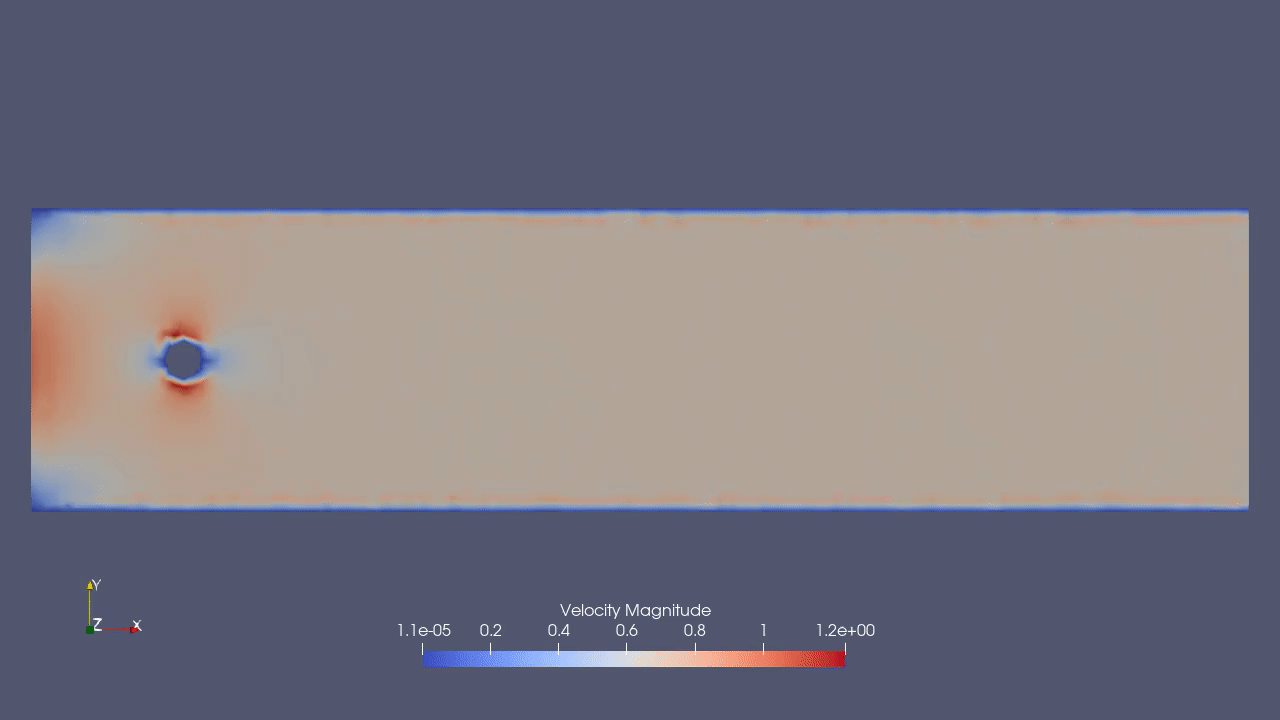

In [ ]:
#@title 

fR = open("R.txt", "r")
R = float(fR.read())

!rm plot_u_anim.py
!wget -c http://www.csc.kth.se/~jjan/digitalmath/plot_u_anim.py 1>wlog1 2>wlog2
#!rm movie2.mp4
!/content/ParaView-5.9.0-osmesa-MPI-Linux-Python3.8-64bit/bin/pvpython plot_u_anim.py
!ffmpeg -y -r 16 -f image2 -s 1280x720 -i "test.%04d.png" -vcodec libx264 -crf 25  -pix_fmt yuv420p movie2.mp4 1>vlog1 2>vlog2

!cp movie2.mp4 /usr/local/share/jupyter/nbextensions/
#from IPython.display import Image
#Image('plot_u.png')
#print('Flow around a circle of radius R =', R)
#from IPython.core.display import display, HTML
#display(HTML("""
#<video autoplay loop width=640 height=360 src="nbextensions/movie2.mp4"</video>
#"""
#))

from IPython.display import HTML, Javascript
from base64 import b64encode

import os
import time
import subprocess
from IPython.display import clear_output
import glob
import shutil
import os.path

def show_image(path_to_image, width=None, height=None):

    mime_type = None
    path_to_image = path_to_image.lower()

    if path_to_image.endswith('.jpg') or path_to_image.endswith('.jpeg'):
        mime_type = 'image/jpeg'
    elif path_to_image.endswith('.png'):
        mime_type = 'image/png'
    elif path_to_image.endswith('.gif'):
        mime_type = 'image/gif'
    else:
        raise ValueError('Unknown extension: %s' % (path_to_image))

    img = open(path_to_image, 'rb').read()
    data_url = 'data:image/jpeg;base64,' + b64encode(img).decode()

    width_str = "width='%d'" % (width) if width is not None else ''
    height_str = "height='%d'" % (width) if height is not None else ''

    display(HTML('<img src="%s" %s %s>' % (data_url, width_str, height_str)))

!cp movie2.mp4 foo.mp4
!ffmpeg -y -i movie2.mp4 -filter_complex "fps=16,setsar=1,palettegen" palette.png >/dev/null 2>/dev/null
!ffmpeg -y -i movie2.mp4 -i palette.png -filter_complex "[0]fps=16,setsar=1[x];[x][1:v]paletteuse" movie2.gif >/dev/null 2>/dev/null


clear_output(wait=True)
# Disable vertical scrolling by setting a massive max-height
display(Javascript('google.colab.output.setIframeHeight(-1, true, {maxHeight: 100000})'))

display(HTML('<h2>Visualization in Digital Math/FEniCS of fluid flow around a circle of radius R=%s</h2>' % str(R)), )
show_image('movie2.gif', width=800)



## **Analysis**

*   We suggested starting with a small value for $R$. What do you observe?
*   Next, go back and try slightly larger circles. 

    1. Return to the section **Interactive Component: Define the Domain** and move the slider up a couple of steps. ***Remember to re-execute the cell so that the new value of R is stored!*** 
    2.  Click the arrow next to the heading of the section above (**The Code**) to collapse the code cells and hide them from view. This will allow you to click only one button to run all of the cells in the section. ***You must re-run the code in this section every time you change R.***
    3. Run the code above to generate a new animation!
* What happens when *R* gets larger? 

## **Conclusion**

Congratulations! You've found a [Karman Vortex Street](https://en.wikipedia.org/wiki/K%C3%A1rm%C3%A1n_vortex_street)! In other words, by increasing the radius of the circle, we found a point at which the fluid flow becomes *unsteady*, resulting in the repeated shedding of vortices (also known as curly loops). This could have alternatively been achieved by decreasing the viscosity or increasing the in-flow velocity.

Although the main purpose of this *interactive paper* is to demonstrate *Colab*, that doesn't mean we can't use the opportunity to have some fun with fluid dynamics! The authors thank you for humoring them with this example.